# Actividad M2
### Facundo Vecchi A01283666

#### Imports y funciones generales

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def translationMatrix(vector):
  matrix = np.identity(len(vector) + 1)
  matrix[-1,:-1] = vector
  return matrix.T

def rotationMatrix(angle_degrees, axis='x', dim=3):
  angle = np.deg2rad(angle_degrees)
  ii = np.cos(angle)
  ji = np.sin(angle)
  matrix = np.identity(dim + 1)
  if axis == 'z':
    matrix[0, 0] = ii
    matrix[1, 1] = ii
    matrix[0, 1] = -ji
    matrix[1, 0] = ji
  elif axis == 'y':
    matrix[0, 0] = ii
    matrix[2, 2] = ii
    matrix[0, 2] = -ji
    matrix[2, 0] = ji
  else:
    matrix[1, 1] = ii
    matrix[2, 2] = ii
    matrix[1, 2] = -ji
    matrix[2, 1] = ji
  return matrix

## Pregunta 1
* Sean tres puntos A = [1, 4, -3], B = [-2, 2, 1] y C = [3, -1, 4]:
* Q se determina escalando el punto A en X, Y y Z por un factor de 1.372 y trasladándolo con las coordenadas de B.
* Rota el punto C, 37.2° con respecto al eje Y. Toma como punto vote al punto Q.

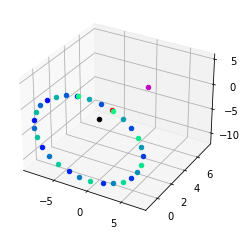

In [29]:
# Definicion de valores iniciales
A = np.array([1,4,-3,0])
B = np.array([-2,2,1])
C = np.array([3, -1, 4, 1])

# Se escala el punto A en todos los ejes por el factor de 1.372
A = A * 1.372
A[3] = 1

# Se traslada el punto pivote con las coordenadas de B
pivot = np.matmul(translationMatrix(B), A)
pivot = [pivot[0],pivot[1],pivot[2]]

# Matrices
traM = translationMatrix(pivot)
rotM = rotationMatrix(37.2, 'y')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

plt.ion()
ax.scatter(0, 0, 0, c='k')
ax.scatter(*pivot, c='m')
ax.scatter(*C[:-1], c='r')

Qaux = C
for color in plt.cm.winter(np.linspace(0, 1, 30)):
  # Translate from a point to the origin
  Qaux = np.matmul(np.linalg.inv(traM), Qaux)

  # Rotate
  Qaux = np.matmul(rotM, Qaux)

  # Translate from a point to the origin
  Qaux = np.matmul(traM, Qaux)

  ax.scatter(*Qaux[:-1], color=color) 

plt.show()

## Pregunta 2
Considera una pirámide triangular regular. Su lado a = π y su altura h = √2a/3 La base de la pirámide está centrada en el punto D = (-2.345, -7.317, 1.328).

1. Encuentra todos los vértices de la pirámide.
2. Encuentra la nueva posición de cada vértice cuando la pirámide es rotada con respecto al eje Z por -23°. Usa como pivote el centroide de la pirámide (el centroide es el promedio de cada componente de cada vértice).

Vertices Originales
Vertice 1: [-0.77420367 -8.59954983  1.328     ]
Vertice 2: [-2.345      -6.03445017  1.328     ]
Vertice 3: [-3.91579633 -8.59954983  1.328     ]
Vertice 4: [-2.345      -7.317       4.04869905]

Centroide:
[-2.345      -7.63763746  2.00817476]

Vertices Rotadas
Vertice 1: [-1.27492346 -9.13684149  1.328     ]
Vertice 2: [-1.71858482 -6.16189578  1.328     ]
Vertice 3: [-4.16677475 -7.90932344  1.328     ]
Vertice 4: [-2.21971696 -7.34248912  4.04869905]



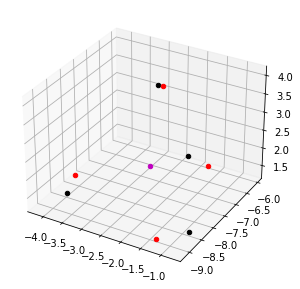

In [30]:
# Definiciones de valores iniciales
a = np.pi
h = np.sqrt(2/3)*a

D = np.array([-2.345, -7.317, 1.328, 1])
ref = np.matmul(translationMatrix([0, -(h/2), 0]), D)
h2 = np.sqrt((np.pi)**2 - (np.pi/2)**2)

# Vertices originales
v1 = np.matmul(translationMatrix([(a/2), 0, 0]), ref)
v2 = np.matmul(translationMatrix([0, (h/2), 0]), D)
v3 = np.matmul(translationMatrix([-(a/2), 0, 0]), ref)
v4 = np.matmul(translationMatrix([0, 0, h2]), D)
vertices = [v1,v2,v3,v4]

print("Vertices Originales")
for i in range(4):
    print('Vertice ' + str(i+1) + ': {}'.format(vertices[i][0:3]))
print("")


#Obtener coordenadas del centroide
centroideM = np.array([0.0,0.0,0.0])
for i in range(3):
    for j in range(4):
        centroideM[i] += vertices[j][i]
centroideM /= 4

print('Centroide:\n{}'.format(centroideM))
print("")

# Vertices rotadas
newVertices = [None] * 4

pivot = np.array(centroideM)
traM = translationMatrix(pivot)
rotM = rotationMatrix(-23, 'z')

for i in range(4):
    newVertices[i] = vertices[i]
    newVertices[i] = np.matmul(np.linalg.inv(traM), newVertices[i])
    newVertices[i] = np.matmul(rotM, newVertices[i])
    newVertices[i] = np.matmul(traM, newVertices[i])

print("Vertices Rotadas")
for i in range(4):
    print('Vertice ' + str(i+1) + ': {}'.format(newVertices[i][0:3]))
print("")

# Display de resultados
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

plt.ion()
ax.scatter(*pivot, c='m')

for i in range(4):
    ax.scatter(*vertices[i][:-1], color='black')

for i in range(4):
    ax.scatter(*newVertices[i][:-1], color='r')

plt.show()
